/Users/leevi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


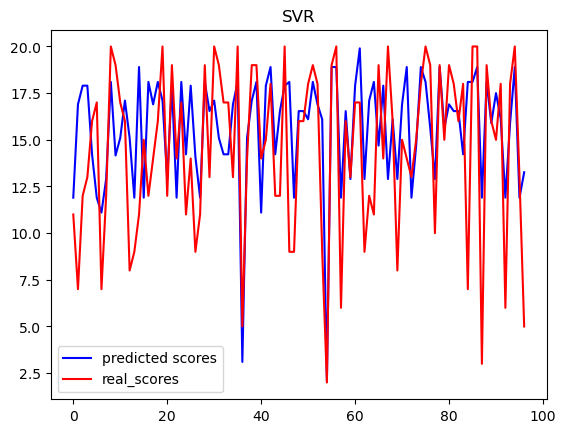

/Users/leevi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leevi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


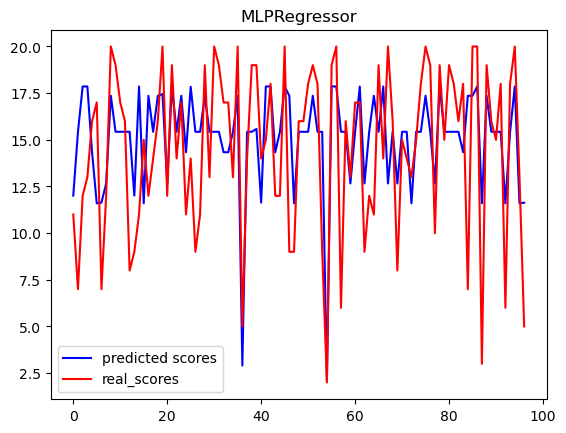

In [1]:
#! python
import matplotlib.pyplot as plt; 
import numpy;
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import pandas as pd;

sessions = pd.read_csv('all_rounds.csv');

# create training dataset - input and output
X = sessions[["t1","t2", "t3", "t4", "speed", "positions"]].to_numpy(); 
Y = sessions[["gscore"]].to_numpy();

# create training/test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2); 

svr = SVR(kernel='rbf', C=200)
svr.fit(X_train, Y_train);  

svr_prediction = svr.predict(X_test); 
svr_mse = mean_squared_error(Y_test, svr_prediction)
svr_rmse1 = numpy.sqrt(svr_mse)

plt.plot(svr_prediction, 'b', label = "predicted scores"); 
plt.plot(Y_test, 'r', label = "real_scores"); 
plt.legend()
plt.title("SVR")
plt.show(); 

mlr = MLPRegressor(activation='logistic', max_iter=5000, solver='lbfgs', hidden_layer_sizes=(3, 8), random_state=42)
mlr.fit(X_train, Y_train)
mlr_prediction = mlr.predict(X_test); 
mlr_mse = mean_squared_error(Y_test, mlr_prediction)
mlr_rmse1 = numpy.sqrt(mlr_mse)

plt.plot(mlr_prediction,  'b', label = "predicted scores"); 
plt.plot(Y_test, 'r', label = "real_scores"); 
plt.legend()
plt.title("MLPRegressor")
plt.show(); 